In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
PATH = "unicorn.csv"
INDUSTRIES = ["Artificial intelligence", "Data management & analytics"]
COLUMNS_FOR_FACTORISATION = ["Country", "Financial Stage"]
NUMERIC_COLUMNS = ["Total Raised", "Valuation", "Founded Year", "Financial Stage", "Investors Count", "Deal Terms"]
NONE_REPLACEMENT = {
    "Total Raised": "$0M",
    "Founded Year": "2000",
    "Deal Terms": "0",
    "Investors Count": "0"
}

dataset = pd.read_csv(PATH)
factorization_table = {}

dataset = dataset.loc[
    dataset['Industry'].isin(
        INDUSTRIES
    )
]

dataset = dataset[
    [
        "Company",
        "Country",
        "Founded Year",
        "Valuation ($B)",
        "Total Raised",
        "Financial Stage",
        "Investors Count",
        "Deal Terms",
    ]
]

dataset.rename(
    columns = {"Valuation ($B)": "Valuation"},
    inplace=True,
)

for column in dataset.columns:
    if column in NONE_REPLACEMENT.keys():
        dataset[column].replace("None", NONE_REPLACEMENT[column], inplace=True)

    if column == "Valuation":
        for index in dataset.index:
            dataset.at[index, column] = float(dataset.at[index, column][1:])

    if column == "Total Raised":
        for index in dataset.index:
            value = dataset.at[index, column][1:]
            if value[-1] == "B":
                dataset.at[index, column] = value[:-1]
            elif value[-1] == "M":
                dataset.at[index, column] = float(value[:-1]) / 1000
            elif value[-1] == "K":
                dataset.at[index, column] = float(value[:-1]) / 1000000

    if column in COLUMNS_FOR_FACTORISATION:
        dataset[column], table = pd.factorize(dataset[column])
        factorization_table[column] = pd.DataFrame(
            columns=[column],
            data=table
        )

    if column in NUMERIC_COLUMNS:
        dataset[column] = pd.to_numeric(dataset[column])

dataset.index = [index for index in range(len(dataset))]

dataset

,Company,Country,Founded Year,Valuation,Total Raised,Financial Stage,Investors Count,Deal Terms
0,Bytedance,0,2012,140.0,7.44000,0,28,8
1,Databricks,1,2013,38.0,3.49700,1,29,8
2,Faire,1,2017,12.4,1.09600,1,14,6
3,Celonis,2,2011,11.0,1.36800,1,13,4
4,Scale AI,1,2018,7.3,0.00000,1,1,0
...,...,...,...,...,...,...,...,...
107,Fractal Analytics,14,2000,1.0,0.68800,1,6,3
108,Placer.ai,1,2016,1.0,0.16634,1,19,1
109,Minio,1,2014,1.0,0.12630,1,13,2
110,Betterfly,15,2018,1.0,0.20250,1,13,1


<AxesSubplot:>

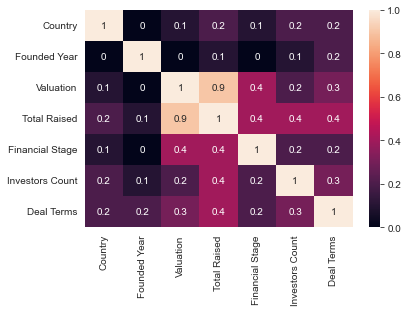

In [3]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True
)

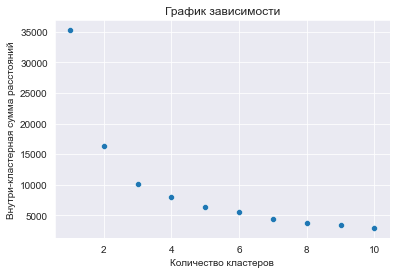

In [4]:
inertia = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(
        dataset.drop(
            "Company",
            axis=1,
        )
    )
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

plt.savefig("Рис 7.jpg")

In [5]:
CLUSTERS = 4

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(
    dataset.drop(
            "Company",
            axis=1,
        )
)

clusters = pd.DataFrame(
    columns=dataset.columns.drop("Company"),
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

,Country,Founded Year,Valuation,Total Raised,Financial Stage,Investors Count,Deal Terms,Amount
0,2.197531,2014.024691,2.339383,0.386509,1.037037,11.888889,2.901235,81
1,0.000000,2012.000000,140.000000,7.440000,0.000000,28.000000,8.000000,1
2,0.750000,2013.250000,5.100625,0.968912,1.000000,31.937500,4.125000,16
3,4.285714,2002.071429,2.366429,0.402460,1.000000,6.428571,2.357143,14


In [6]:
factorization_table["Country"]

,Country
0,China
1,United States
2,Germany
3,Belgium
4,United Kingdom
5,Japan
6,Israel
7,Bermuda
8,Norway
9,Estonia
